In [2]:
%load_ext autoreload
%autoreload 2

# TDA in BUSI

## 考察input的feature

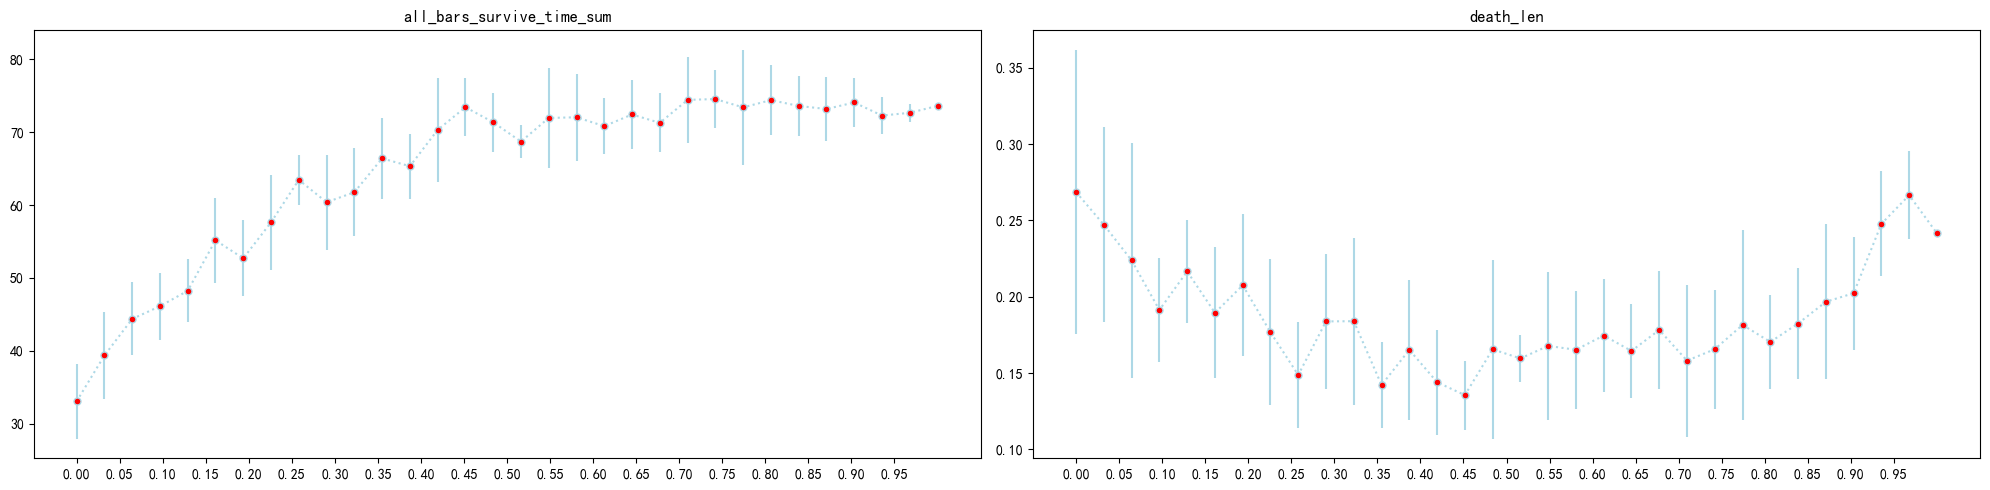

In [2]:
# 加载自己的包
from TDA.data_tda import Image2TDA, CompareTDA

folder = ".//Result//UNeXt_input_TDA//input_BUSI"
test_BOF = CompareTDA(file_path=folder, target_pkl="L2_betti_features_0th.pkl")

# print(test_BOF.comb_BOF)
test_BOF.draw_BOF(net_name="Data", aug_name="crop")

## 考察input的bars

### 首先加载数据

In [1]:
import pickle
# 定义一个加载pkl文件的函数
def print_pkl_file(file_path):
    try:
        with open(file_path, 'rb') as file:
            data = pickle.load(file)
            # print(data)
    except Exception as e:
        print(f"Error: {e}")
    
    return data


### 然后绘制图像

In [51]:
import os
import matplotlib.pyplot as plt

def plot_stacked_horizontal_bars2(ax, bar_data, index_title, color, pre_index):
    """
    绘制表示持续区间的堆叠水平条形图。

    参数:
    - ax (matplotlib.axes._axes.Axes): 子图对象。
    - bar_data (列表): 表示持续区间的数据列表，每个元素是包含起始和结束位置的列表。
    - index_title (整数): 用于标题的索引。
    - color (str): 条形图的颜色。
    - plt_title (str): 图的标题。

    返回: 无返回值，但会在子图上显示绘制的水平条形图。
    """

    for index, bar in enumerate(bar_data):
        # print(bar)
        start = bar[0]  # 起始位置
        end = bar[1]    # 结束位置
        # 绘制水平条形图
        if index == 0:
            ax.barh(index + pre_index,  end - start, left=start, height=0.5, color=color)
        else:
            ax.barh(index + pre_index,  end - start, left=start, height=0.5, color=color)
         # 在y轴上添加标签
    ax.text(-0.1, (index/2 + pre_index), f"B{index_title}", verticalalignment='center', fontsize=25)


def plot_betti_number_bars2(betti_number, plt_title=None, root=None):
    """
    绘制表示 Betti 数的堆叠水平条形图。

    参数:
    - betti_number (列表的列表): 包含多个 Betti 数的列表，每个 Betti 数以堆叠水平条形图表示。
    - bar_spacing (浮点数): 条形图之间的间距。
    - plt_title (str): 图的标题。
    - root (str): 图的保存路径。

    返回: 无返回值，但会在同一张图上显示绘制的堆叠水平条形图。
    """
    if not os.path.exists(root):
        os.makedirs(root)

    fig, ax = plt.subplots()

    colors = ['red', 'black']  # 定义不同 Betti 数的颜色
    pre_index = 0
    for index, (value, color) in enumerate(zip(betti_number, colors)):
        if index == 0:
            pre_index += len(betti_number[1])
        else:
            pre_index = 0
        plot_stacked_horizontal_bars2(ax, value, index, color, pre_index)
        

    # 设置坐标轴标签
    # ax.set_ylabel(r'Radius ($\epsilon$)')
    ax.set_xlabel(r'Radius ($\epsilon$)', fontsize=25)
    ax.set_title(f"Persistence Barcode", fontsize=30)
    # ax = plt.gca()
    # ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    # 隐藏右边和上边的坐标轴
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # 添加箭头标记
    ax.annotate('', xytext=(-0.1, -0.1), xy=(-0.1, 1.1), arrowprops=dict(facecolor='black', arrowstyle='->'))
    ax.annotate('', xytext=(-0.1, -0.1), xy=(1.1, -0.1), arrowprops=dict(facecolor='black', arrowstyle='->'))


    # 添加图例
    # ax.legend()
    
    # plt.vlines([0,1], -1, 1000, colors='r', linestyles='dashed', label='垂直线')
    plt.grid(axis="x",linestyle='-.', color='lightblue')
    # 保存图片
    save_path = os.path.join(root, f"Betti_Bars_{plt_title}.pdf")
    plt.savefig(save_path)

    # 显示图表
    plt.show()


In [4]:
# 例子
# Result\20240116_kaiming_5k_2\LeNet\angle\0\bars_betti_features_12th.pkl
pkl_file_path = './Result/20240116_kaiming_5k_2/LeNet/angle/0/bars_betti_features_12th.pkl'
test_data = print_pkl_file(pkl_file_path)
L12save = test_data['L1_betti_number_list'][0]
L22save = test_data['L2_betti_number_list'][0]

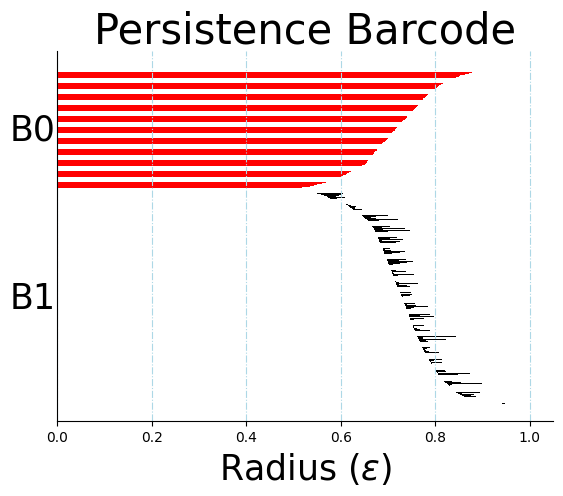

In [52]:
data = L22save
plot_betti_number_bars2(betti_number=data, plt_title='L2', root="./test/")

### 批量处理 

In [ ]:
# 单个处理的例子
pkl_file_path = './Result/UNext_output_TDA/input_BUSI/8/bars_betti_features_12th.pkl'
test_data = print_pkl_file(pkl_file_path)
L12save = test_data['L1_betti_number_list'][0]
L22save = test_data['L2_betti_number_list'][0]

plot_betti_number_bars2(betti_number=L12save, plt_title='L1{}'.format(5), root="./test/")
plot_betti_number_bars2(betti_number=L22save, plt_title='L2{}'.format(5), root="./test/")

In [ ]:
import os

def print_subdirectories(folder_path):
    """
    打印指定文件夹下的子文件夹路径。

    参数:
    - folder_path (str): 目标文件夹的路径。

    返回: 无返回值，但会打印子文件夹的路径。
    """
    # 获取文件夹下的所有子文件夹
    subdirectories = [os.path.join(folder_path, d) for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]

    # 打印子文件夹的路径
    for subdirectory in subdirectories:
        print(os.path.join(subdirectory, 'bars_betti_features_12th.pkl'))
        pkl_file_path = os.path.join(subdirectory, 'bars_betti_features_12th.pkl')
        test_data = print_pkl_file(pkl_file_path)
        L12save = test_data['L1_betti_number_list'][0]
        L22save = test_data['L2_betti_number_list'][0]

        plot_betti_number_bars2(betti_number=L12save, plt_title='L1{}'.format(subdirectory.split('/')[-1]), root="./test/")
        plot_betti_number_bars2(betti_number=L22save, plt_title='L2{}'.format(subdirectory.split('/')[-1]), root="./test/")

# 示例用法
folder_path = "./Result/UNext_output_TDA/input_BUSI/"
print_subdirectories(folder_path)
